<a href="https://colab.research.google.com/github/satishgunjal/Kaggle-Projects/blob/master/01_Linear_Regression_Multivariate/Polynomial_Linear_Regression_Fish_Weight_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
 
![header.png](https://raw.githubusercontent.com/satishgunjal/images/master/fish.png)
 
In this study I will create a machine learning model to predict the weight of the fish based on the body measurement data of seven types of fish species. You can download the dataset from Kaggle. [Fish market](https://www.kaggle.com/aungpyaeap/fish-market)
 
I am going to use Polynomial feature with Linear model from sklearn library. Since there are multiple features its **Polynomial Multivariate Linear Regression** problem.
 
I have documented the code and tried to explain every important concept or library I have using during this study. I hope it will be helpful.
 
#kaggle #linearregression #polynomialregression #python



# Step 1: Import The Required Files
* numpy : Numpy is the core library for scientific computing in Python. It is used for working with arrays and matrices.
* pandas: Used for data manipulation and analysis
* matplotlib : It’s plotting library, and we are going to use it for data visualization
* seaborn : It is also data visualization library, based on matplotlib
* linear_model: Sklearn linear regression model
* train_test_split : helper function from Sklearn library for splitting the dataset
* sklearn.metrics : Library encapsulate functions to measure the model performance
* PolynomialFeatures : This used to generate polynomial features. In this study we are going to generate second degree features.
 



In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures 

# Steps 2: Load The Data

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/satishgunjal/datasets/master/Fish.csv')
print('Dimension of dataset= ', df.shape)
df.head(5) # head(n) returns first n records only. Can also use sample(n) for random n records.

Dimension of dataset=  (159, 7)


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


 
# Step 3: Understand The Data
* There are total 159 rows(training samples) and 7 columns in dataset. 
* Each column details are as below 
 
| Column Name | Details
| ------------|--------------
| Species     | Species name of fish 
| Weight      | Weight of fish in gram     
| Length1     | Vertical length in CM
| Length2     | Diagonal length in CM
| Length3     | Cross length in CM
| Height      | Height in CM
| Width       | Diagonal width in CM   
 
* Features/input values/independent variables are 'Species', 'Length1','Length2', 'Length3', 'Height' and 'Width'
* Target/output value/dependent variable is 'Weight'
* So, we have to estimate the weight of the fish based on its measurement values.
 
Let's change the name of columns lenght1,length2 and length3  as per the content of it.

In [0]:
df1 = df.rename(columns={'Length1':'VerticalLen','Length2':'DiagonalLen','Length3':'CrossLen'})
df1.sample(5) # Display random 5 records

,Species,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
87,Perch,120.0,20.0,22.0,23.5,5.6400,3.5250
74,Perch,40.0,13.8,15.0,16.0,3.8240,2.4320
73,Perch,32.0,12.5,13.7,14.7,3.5280,1.9992
77,Perch,100.0,16.2,18.0,19.2,5.2224,3.3216
27,Bream,714.0,32.7,36.0,41.5,16.5170,5.8515


Let's print the detailed information about our dataset

In [0]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Species      159 non-null    object 
 1   Weight       159 non-null    float64
 2   VerticalLen  159 non-null    float64
 3   DiagonalLen  159 non-null    float64
 4   CrossLen     159 non-null    float64
 5   Height       159 non-null    float64
 6   Width        159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


# Step 4: Data Analysis Cleaning and Visualization

## Correlation Check
* Correlation helps us investigate and establish relationships between variables
* Note that high amount of correlation between independent variables suggest that linear regression estimation will be unreliable


In [0]:
df1.corr()

,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
VerticalLen,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
DiagonalLen,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
CrossLen,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

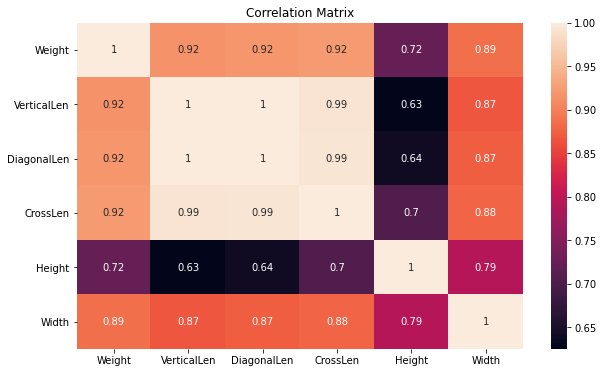

In [0]:
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
sns.heatmap(df1.corr(), annot =True)
plt.title('Correlation Matrix')

## Reading Correlation Matrix 
* Correlation coefficient range from -1 to +1
* Sign(+/-) indicate the direction and amount indicate the strength of correlation
* +1.00 means perfect positive relationship
* 0.00 means no relationship
* -1.00 means perfect negative relationship
* The correlation between 'VerticalLen', 'DiagonalLen' and 'Crosslen' is almost 1. This may cause 'Multicolinearity'. In another study where I tried to solve thos
 
Let's drop the 'VerticalLen', 'DiagonalLen' and 'Crosslen' column.
 



In [0]:
df2 = df1.drop(['VerticalLen', 'DiagonalLen', 'CrossLen'], axis =1) # Can also use axis = 'columns'
print('New dimension of dataset is= ', df2.shape)
df2.head(3)

New dimension of dataset is=  (159, 4)


,Species,Weight,Height,Width
0,Bream,242.0,11.5200,4.0200
1,Bream,290.0,12.4800,4.3056
2,Bream,340.0,12.3778,4.6961


## Visulization Using Pairplot

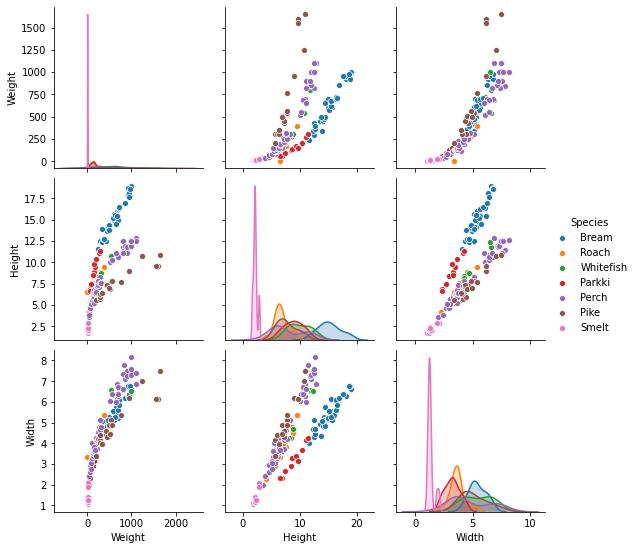

In [0]:
sns.pairplot(df2, kind = 'scatter', hue = 'Species')

From the above pair plot, we can see that there seems to be some correlations between  Height, Width and the Weight. Note that since we have multiple species the correlation between Height and Width of all species is not exactly linear with Weight.
 
Now, since we have the final dataset ready lets analyze and remove the outliers if any


## Outlier Detection and Removal
 
* Outlier is an extremely high or extremely low value in our data
* We use below formula to identify the outlier
  ```
    ( Greater than Q3 + 1.5 * IQR ) OR ( Lower than Q1 -1.5 * IQR )
 
    where,
    Q1  = First quartile
    Q3  = Third quartile
    IQR = Interquartile range (Q3 - Q1)
  ```
 
* We will use box plot for outlier visualization. 
* Vertical line on the left side of box plot represent the 'min' value of dataset and vertical line on right side of box plot represent the 'max' value of dataset. Any value which is outside this range is outlier and represented by '*'
 
Lets write function for outlier detection

In [0]:
def outlier_detection(dataframe):
  """
  Find the outlier in given dataset. To get the index fo the outlier data, please input single column dataframe

  Input Parameters
  ----------------
  dataframe : single column dataframe
  
  Output Parameters
  -----------------
  outlier : Index of outlier training examples.
  """
  Q1 = dataframe.quantile(0.25)
  Q3 = dataframe.quantile(0.75)
  IQR = Q3 - Q1
  upper_end = Q3 + 1.5 * IQR
  lower_end = Q1 - 1.5 * IQR 
  outlier = dataframe[(dataframe > upper_end) | (dataframe < lower_end)]
  return outlier

Lets find the outliers for every feature column

### Outlier detection based on Weight

Text(0.5, 1.0, 'Outlier Detection Based on Weight')

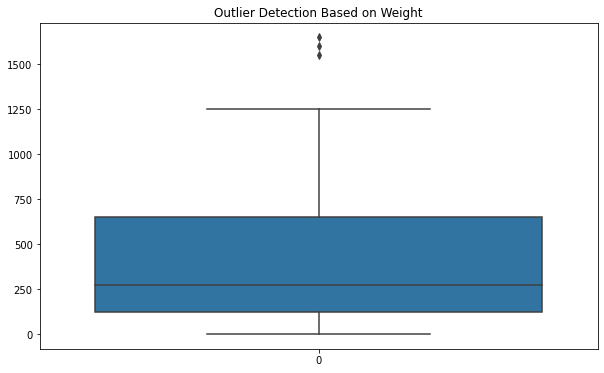

In [0]:
sns.boxplot(data= df2['Weight'] )
plt.title('Outlier Detection Based on Weight')

In [0]:
# 'Species' column contains categorical values, so using list slicing to iterate over all the columns except first one
for column in df2.columns[1:]: 
    print('\nOutliers in column "%s" ' % column)
    outlier = outlier_detection(df2[column])
    print(outlier)


Outliers in column "Weight" 
142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64

Outliers in column "Height" 
Series([], Name: Height, dtype: float64)

Outliers in column "Width" 
Series([], Name: Width, dtype: float64)


* For features Weight, VerticalLen and DiagonalLen index number 142, 143 and 144 are the outliers.
* For feature CrossLen index 144 is outlier
* For features Height and Width there are no outliers
* Important thing to note is, we haven't consider the individual fish species count and physical properties while finding the outliers. For e.g. Pike are bigger and Smelt are smaller fish species. We have 56 training examples for 'Perch' and only 6 training examples for 'Whitefish' fish species.
* Though we have small dataset, species wise outlier detection will help to make our model more accurate.
 
So lets find the outlier for each species.



In [0]:
#Lets create temp dataframe without 'Weight' feature for plotting the boxplot
df_temp = df2.drop(['Weight'], axis = 'columns')

### Outlier detection for Perch species

Text(0.5, 1.0, 'Outlier Detection For Pearch Species')

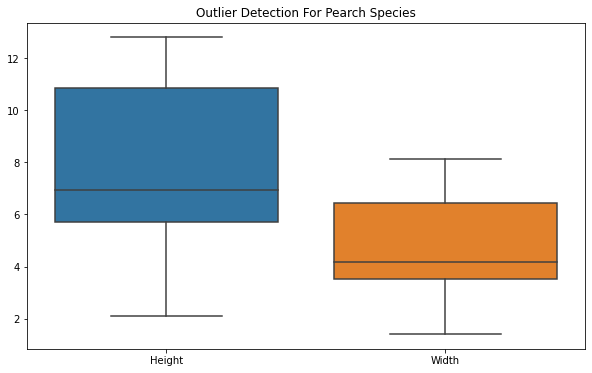

In [0]:
sns.boxplot(data= df_temp[df_temp.Species == 'Perch'] )
plt.title('Outlier Detection For Pearch Species')

In [0]:
df_Perch = df2[df2.Species == 'Perch']
for column in df_Perch.columns[1:]: 
    print('\nOutliers in column "%s" ' % column)
    outlier = outlier_detection(df_Perch[column])
    print(outlier)


Outliers in column "Weight" 
Series([], Name: Weight, dtype: float64)

Outliers in column "Height" 
Series([], Name: Height, dtype: float64)

Outliers in column "Width" 
Series([], Name: Width, dtype: float64)


There are no outliers for 'Perch' fish species

### Outlier detection for Bream species

Text(0.5, 1.0, 'Outlier Detection For Bream Species')

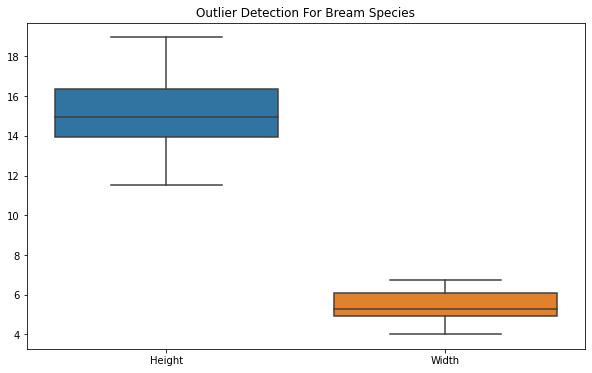

In [0]:
sns.boxplot(data= df_temp[df_temp.Species == 'Bream'] )
plt.title('Outlier Detection For Bream Species')

In [0]:
df_Bream = df2[df2.Species == 'Bream']
for column in df_Bream.columns[1:]: 
    print('\nOutliers in column "%s" ' % column)
    outlier = outlier_detection(df_Bream[column])
    print(outlier)


Outliers in column "Weight" 
Series([], Name: Weight, dtype: float64)

Outliers in column "Height" 
Series([], Name: Height, dtype: float64)

Outliers in column "Width" 
Series([], Name: Width, dtype: float64)


There are no outliers for 'Pearch' species

### Outlier detection for Roach species

Text(0.5, 1.0, 'Outlier Detection For Roach Species')

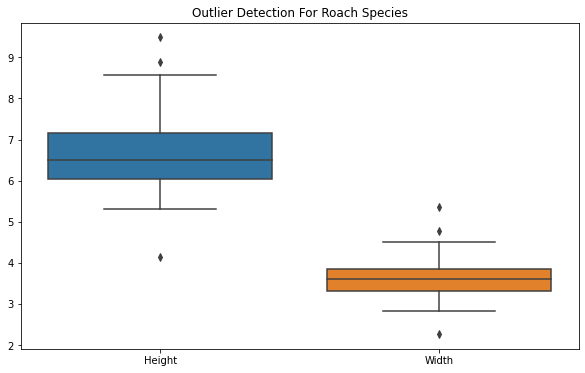

In [0]:
sns.boxplot(data= df_temp[df_temp.Species == 'Roach'] )
plt.title('Outlier Detection For Roach Species')

In [0]:
df_Roach = df2[df2.Species == 'Roach']
for column in df_Roach.columns[1:]: 
    print('\nOutliers in column "%s" ' % column)
    outlier = outlier_detection(df_Roach[column])
    print(outlier)


Outliers in column "Weight" 
40      0.0
52    290.0
54    390.0
Name: Weight, dtype: float64

Outliers in column "Height" 
35    4.1472
52    8.8768
54    9.4850
Name: Height, dtype: float64

Outliers in column "Width" 
35    2.2680
53    4.7736
54    5.3550
Name: Width, dtype: float64


As you can see only row 54 and 35 are common across majority features, so we can safily remove them

### Outlier detection for Pike species

Text(0.5, 1.0, 'Outlier Detection For Pike Species')

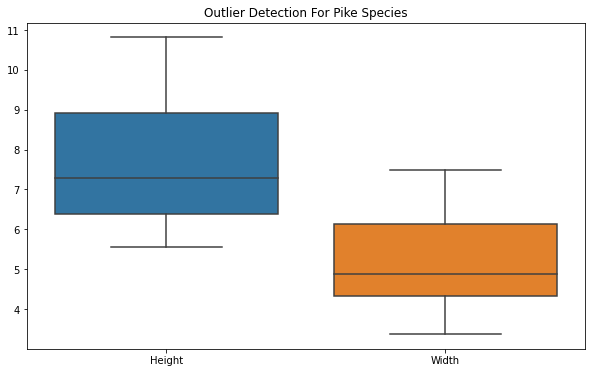

In [0]:
sns.boxplot(data= df_temp[df_temp.Species == 'Pike'] )
plt.title('Outlier Detection For Pike Species')

In [0]:
df_Pike = df2[df2.Species == 'Pike']
for column in df_Pike.columns[1:]: 
    print('\nOutliers in column "%s" ' % column)
    outlier = outlier_detection(df_Pike[column])
    print(outlier)


Outliers in column "Weight" 
Series([], Name: Weight, dtype: float64)

Outliers in column "Height" 
Series([], Name: Height, dtype: float64)

Outliers in column "Width" 
Series([], Name: Width, dtype: float64)


No outlier for Pike species

### Outlier detection for Smelt species

Text(0.5, 1.0, 'Outlier Detection For Smelt Species')

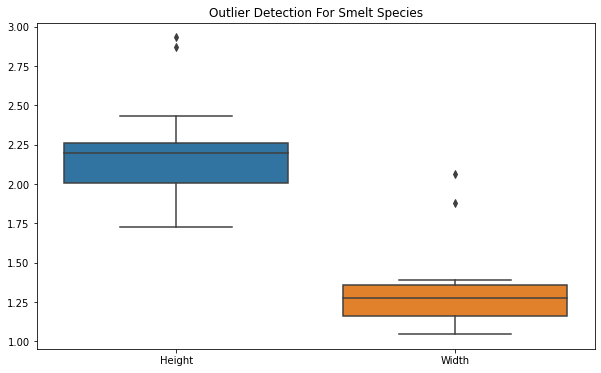

In [0]:
sns.boxplot(data= df_temp[df_temp.Species == 'Smelt'] )
plt.title('Outlier Detection For Smelt Species')

In [0]:
df_Smelt = df2[df2.Species == 'Smelt']
for column in df_Smelt.columns[1:]: 
    print('\nOutliers in column "%s" ' % column)
    outlier = outlier_detection(df_Smelt[column])
    print(outlier)


Outliers in column "Weight" 
157    19.7
158    19.9
Name: Weight, dtype: float64

Outliers in column "Height" 
157    2.8728
158    2.9322
Name: Height, dtype: float64

Outliers in column "Width" 
157    2.0672
158    1.8792
Name: Width, dtype: float64


As you can see only rows 157 and 158 are common across multiple features, so we can safily remove them

### Outlier detection for Parkki species

Text(0.5, 1.0, 'Outlier Detection For Parkki Species')

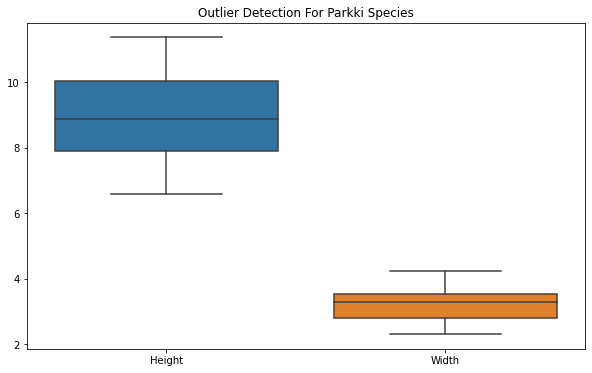

In [0]:
sns.boxplot(data= df_temp[df_temp.Species == 'Parkki'] )
plt.title('Outlier Detection For Parkki Species')

In [0]:
df_Parkki = df2[df2.Species == 'Parkki']
for column in df_Parkki.columns[1:]: 
    print('\nOutliers in column "%s" ' % column)
    outlier = outlier_detection(df_Parkki[column])
    print(outlier)


Outliers in column "Weight" 
Series([], Name: Weight, dtype: float64)

Outliers in column "Height" 
Series([], Name: Height, dtype: float64)

Outliers in column "Width" 
Series([], Name: Width, dtype: float64)


No outliers for Parkki species

### Outlier detection for Whitefish species

Text(0.5, 1.0, 'Outlier Detection For Whitefish Species')

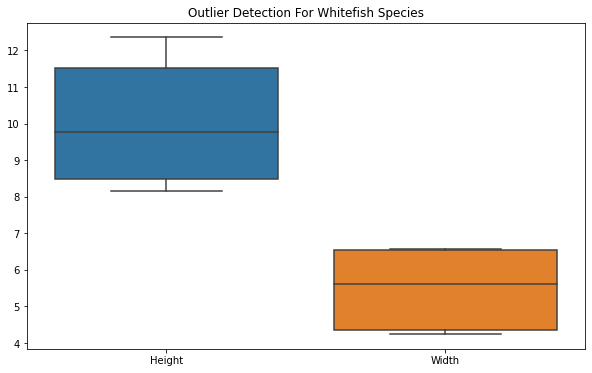

In [0]:
sns.boxplot(data= df_temp[df_temp.Species == 'Whitefish'] )
plt.title('Outlier Detection For Whitefish Species')

In [0]:
df_Whitefish = df2[df2.Species == 'Whitefish']
for column in df_Whitefish.columns[1:]: 
    print('\nOutliers in column "%s" ' % column)
    outlier = outlier_detection(df_Whitefish[column])
    print(outlier)


Outliers in column "Weight" 
Series([], Name: Weight, dtype: float64)

Outliers in column "Height" 
Series([], Name: Height, dtype: float64)

Outliers in column "Width" 
Series([], Name: Width, dtype: float64)


No outlier for Whitefish species

### Dropping the outlier rows
* If we dont consider species specific measurement then outlier are 142, 143 and 144
* And as per species specific measurement outliers are 35, 54, 157 and 158
* Lets drop the species specific outliers only

In [0]:
df3 = df2.drop([35,54,157,158])
df3.shape

(155, 4)

## Check for null values

In [0]:
df3.isna().sum()

Species    0
Weight     0
Height     0
Width      0
dtype: int64

## Using Domain Knowledge For Data Cleaning
* Now lets use some common sense and find and remove the training data where weight of fish is 0 or negative

In [0]:
df3[df3.Weight <= 0]

,Species,Weight,Height,Width
40,Roach,0.0,6.4752,3.3516


In [0]:
df4 = df3.drop([40])
df4.shape

(154, 4)

In [0]:
dummies_species = pd.get_dummies(df4.Species) # store the dummy variables in 'dummies_species' dataframe
dummies_species.head(3) # To do get individual dummy value

,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0


Now lets create new dataframe using dummies_species dataframe

In [0]:
df5 = pd.concat([df4, dummies_species],axis = 'columns')
df5.head(3)

,Species,Weight,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,Bream,242.0,11.5200,4.0200,1,0,0,0,0,0,0
1,Bream,290.0,12.4800,4.3056,1,0,0,0,0,0,0
2,Bream,340.0,12.3778,4.6961,1,0,0,0,0,0,0


Since we have dummy variables we can drop the 'Species' column and to avoide the 'Dummy Variable Trap' problem we will also drop 'Whitefish' column

In [0]:
df6 = df5.drop(['Species','Whitefish'], axis = 'columns')
df6.head(3)

,Weight,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt
0,242.0,11.5200,4.0200,1,0,0,0,0,0
1,290.0,12.4800,4.3056,1,0,0,0,0,0
2,340.0,12.3778,4.6961,1,0,0,0,0,0


# Step 5: Build Machine Learning Model

## Create Feature Matrix X and Target Variable y

In [0]:
X = df6[['Height', 'Width', 'Bream', 'Parkki' ,'Perch', 'Pike', 'Roach', 'Smelt']] # Or can use df6.iloc[:,[1,2,3,4,5,6,7,8]]
y = df6[['Weight']]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

X_train dimension=  (123, 8)
X_test dimension=  (31, 8)
y_train dimension=  (123, 1)
y_train dimension=  (31, 1)


## Polynomial Features
* Since we have multiple species, the relation between features(Height, Width) and Weight is not linear
* Line won't be good fit to the given data and may result in under fitting. 
* We are going to use second degree polynomial feature, which will give us quadratic curve to fit the data.
 
**Refer my notebook(Multivariate_Linear_Regression_Fish_Weight_Prediction) where I used Linear Regression  without polynomial features**



In [0]:
poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(X_train) 
poly.fit(X_poly, y_train) 

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

## Ordinary Least Squares Algorithm

* Lets the train the model using Ordinary Least Squares Algorithm
* This is one of the most basic linear regression algorithm.
* Mathematical formula used by ordinary least square algorithm is as below,

   ![ordinary_least_squares_formlua.png](https://github.com/satishgunjal/images/blob/master/ordinary_least_squares_formlua_1.png?raw=true)
* The objective of Ordinary Least Square Algorithm is to minimize the residual sum of squares. Here the term residual means 'deviation of predicted value(Xw) from actual value(y)'
* Note that, problem with ordinary least square model is size of coefficients increase exponentially with increase in model complexity

In [0]:
lm = linear_model.LinearRegression() 
lm.fit(X_poly, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Understanding Training Results
* If training is successful then we get the result like above. Where all the default values used by LinearRgression() model are displayed. If required we can also pass these values in fit method. We are not going to change any of these values for now.

In [0]:
predictions = lm.predict(poly.fit_transform(X_test))
print('r2_score= ', metrics.r2_score(y_test, predictions))

r2_score=  0.9843737850614364


## Model Score
R-squared is statistical measure of how close the data to the fitted regression line. It is also known as coefficient of determination but since we have multiple features here we can also call it 'coefficient of multiple determination'
 



## Predicting The Test Data
* Check below table for weight from test data and predicted weight by our model
* We will also plot the scatter plot of weight from test data vs predicted weight

In [0]:
predictedWeight = pd.DataFrame(predictions, columns=['Predicted Weight']) # Create new dataframe of column'Predicted Weight'
actualWeight = pd.DataFrame(y_test)
actualWeight = actualWeight.reset_index(drop=True) # Drop the index so that we can concat it, to create new dataframe
df_actual_vs_predicted = pd.concat([actualWeight,predictedWeight],axis =1)
df_actual_vs_predicted.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
Weight,500.000000,80.000000,1650.000000,145.000000,7.500000,600.000000,265.000000,1000.000000,600.000000,120.000000,540.000000,150.000000,320.000000,300.000000,1000.000000,260.000000,180.0000,197.000000,9.800000,180.000000,12.200000,500.000000,273.000000,900.000000,475.000000,955.000000,87.000000,300.000000,820.000000,145.000000,145.000000
Predicted Weight,516.266142,101.025321,1664.916358,138.349196,8.563842,562.182649,227.464206,1059.780593,629.400103,107.310558,727.423661,144.644958,286.357043,335.950921,898.228593,235.577877,173.6796,189.934216,10.229318,163.991731,8.978168,500.303335,282.874746,866.949054,512.014096,913.822765,102.365671,285.907577,746.053757,165.799267,135.817644


Text(0.5, 1.0, 'Weight From test Data Vs Weight Predicted By Model')

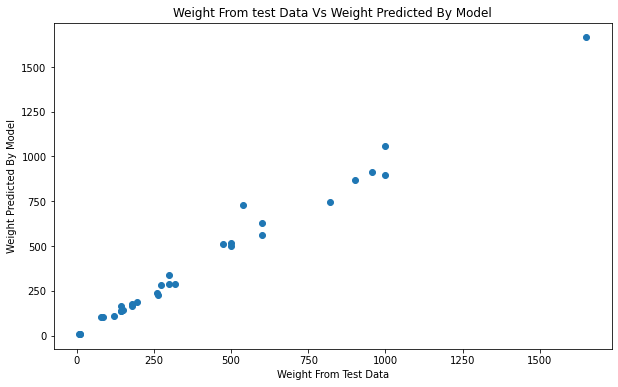

In [0]:
plt.scatter(y_test, predictions)
plt.xlabel('Weight From Test Data')
plt.ylabel('Weight Predicted By Model')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("Weight From test Data Vs Weight Predicted By Model")

# Step 6: Evaluating the Model

Plot a histogram of the residuals.

Text(0.5, 1.0, 'Histogram of Residuals')

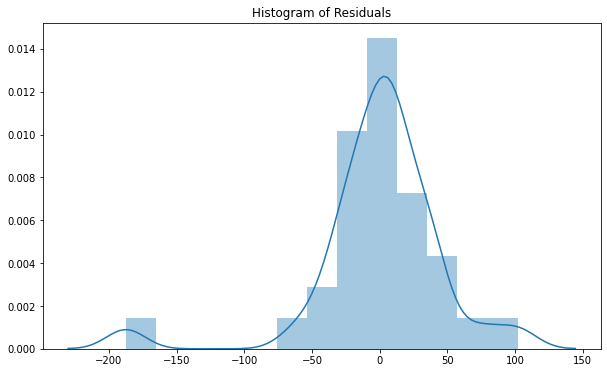

In [0]:
sns.distplot((y_test-predictions))
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("Histogram of Residuals")

# Conclusion
* As you can see from above results our model score is 98%, which is very good.
* And there are no negative weight values
* So our approach of finding the outlier based on species and using second degree polynomial features worked!

 

